In [1]:
import pandas as pd

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("C:/Users/Admin/Desktop/CAN ALM/thuc hanh/Online Retail.csv", encoding='ISO-8859-1')

# Hi·ªÉn th·ªã th√¥ng tin t·ªïng quan
print("Th√¥ng tin chung v·ªÅ d·ªØ li·ªáu:")
print(df.info())
print("\n5 d√≤ng ƒë·∫ßu ti√™n:")
print(df.head())

Th√¥ng tin chung v·ªÅ d·ªØ li·ªáu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

5 d√≤ng ƒë·∫ßu ti√™n:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT 

In [2]:
## Th·ªëng k√™ m√¥ t·∫£
print("\nTh·ªëng k√™ m√¥ t·∫£:")
print(df.describe())

# Ki·ªÉm tra s·ªë d√≤ng tr√πng l·∫∑p
duplicate_rows = df.duplicated().sum()
print(f"\nS·ªë d√≤ng b·ªã tr√πng l·∫∑p: {duplicate_rows}")

# Ki·ªÉm tra s·ªë l∆∞·ª£ng giao d·ªãch duy nh·∫•t
num_invoices = df['InvoiceNo'].nunique()
print(f"S·ªë l∆∞·ª£ng giao d·ªãch (InvoiceNo) duy nh·∫•t: {num_invoices}")

# Ki·ªÉm tra s·ªë kh√°ch h√†ng duy nh·∫•t
num_customers = df['CustomerID'].nunique()
print(f"S·ªë l∆∞·ª£ng kh√°ch h√†ng duy nh·∫•t: {num_customers}")

# Ki·ªÉm tra s·ªë qu·ªëc gia
num_countries = df['Country'].nunique()
print(f"S·ªë l∆∞·ª£ng qu·ªëc gia: {num_countries}")
print(f"C√°c qu·ªëc gia:\n{df['Country'].unique()}")




Th·ªëng k√™ m√¥ t·∫£:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

S·ªë d√≤ng b·ªã tr√πng l·∫∑p: 5268
S·ªë l∆∞·ª£ng giao d·ªãch (InvoiceNo) duy nh·∫•t: 25900
S·ªë l∆∞·ª£ng kh√°ch h√†ng duy nh·∫•t: 4372
S·ªë l∆∞·ª£ng qu·ªëc gia: 38
C√°c qu·ªëc gia:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabi

In [3]:

# Ki·ªÉm tra c√°c gi√° tr·ªã thi·∫øu
print("\nS·ªë l∆∞·ª£ng gi√° tr·ªã thi·∫øu:")
print(df.isnull().sum())


S·ªë l∆∞·ª£ng gi√° tr·ªã thi·∫øu:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
# 1. Lo·∫°i b·ªè c√°c d√≤ng thi·∫øu th√¥ng tin quan tr·ªçng
df.dropna(subset=['InvoiceNo', 'StockCode', 'Description', 'CustomerID'], inplace=True)

# 2. Lo·∫°i b·ªè c√°c h√≥a ƒë∆°n b·ªã h·ªßy (InvoiceNo b·∫Øt ƒë·∫ßu b·∫±ng 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Lo·∫°i b·ªè c√°c d√≤ng c√≥ Quantity <= 0 ho·∫∑c UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 4. Chuy·ªÉn ki·ªÉu d·ªØ li·ªáu c·ªôt 'InvoiceDate' v·ªÅ d·∫°ng datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 5. T·∫°o th√™m c·ªôt 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Ki·ªÉm tra k·∫øt qu·∫£
print("D·ªØ li·ªáu sau x·ª≠ l√Ω:")
print(df.info())


D·ªØ li·ªáu sau x·ª≠ l√Ω:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB
None


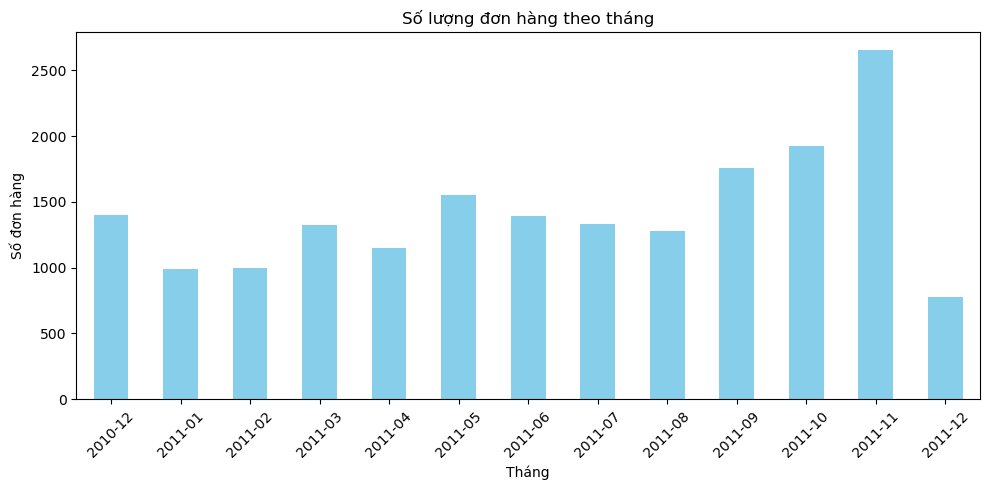

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Th√™m c·ªôt 'Month' ƒë·ªÉ nh√≥m theo th√°ng
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# T√≠nh s·ªë l∆∞·ª£ng ƒë∆°n h√†ng theo th√°ng
monthly_orders = df.groupby('Month')['InvoiceNo'].nunique()

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 5))
monthly_orders.plot(kind='bar', color='skyblue')
plt.title('S·ªë l∆∞·ª£ng ƒë∆°n h√†ng theo th√°ng')
plt.xlabel('Th√°ng')
plt.ylabel('S·ªë ƒë∆°n h√†ng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


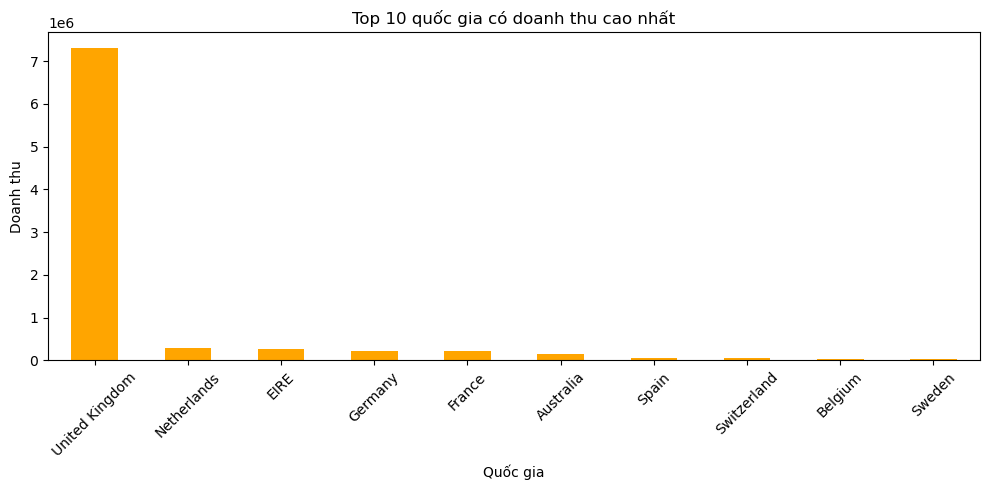

In [6]:
# T√≠nh t·ªïng doanh thu theo qu·ªëc gia
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# L·∫•y top 10 qu·ªëc gia c√≥ doanh thu cao nh·∫•t (ngo·∫°i tr·ª´ UK n·∫øu mu·ªën)
top_countries = country_revenue.head(10)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 qu·ªëc gia c√≥ doanh thu cao nh·∫•t')
plt.xlabel('Qu·ªëc gia')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

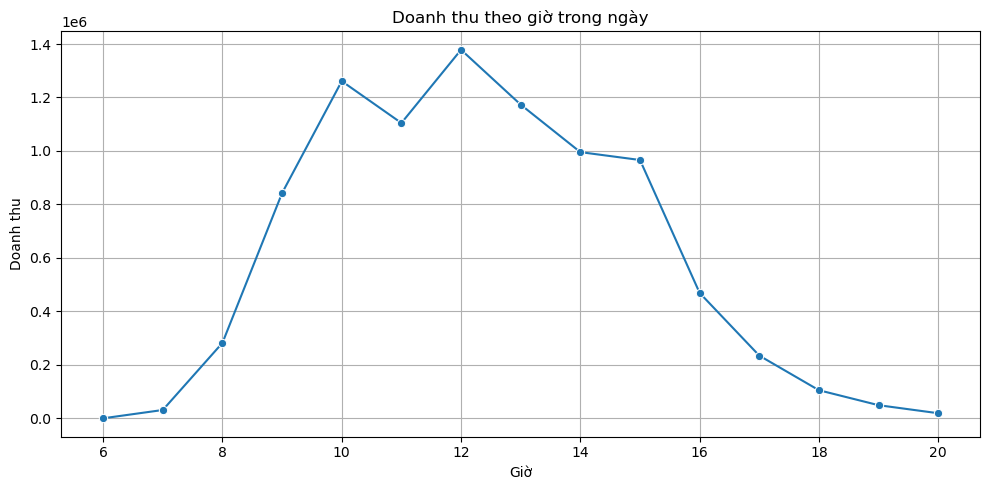

In [7]:
# Th√™m c·ªôt 'Hour' ƒë·ªÉ ph√¢n t√≠ch theo gi·ªù
df['Hour'] = df['InvoiceDate'].dt.hour

# T√≠nh doanh thu theo gi·ªù
hourly_revenue = df.groupby('Hour')['TotalPrice'].sum()

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_revenue.index, y=hourly_revenue.values, marker='o')
plt.title('Doanh thu theo gi·ªù trong ng√†y')
plt.xlabel('Gi·ªù')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.tight_layout()
plt.show()


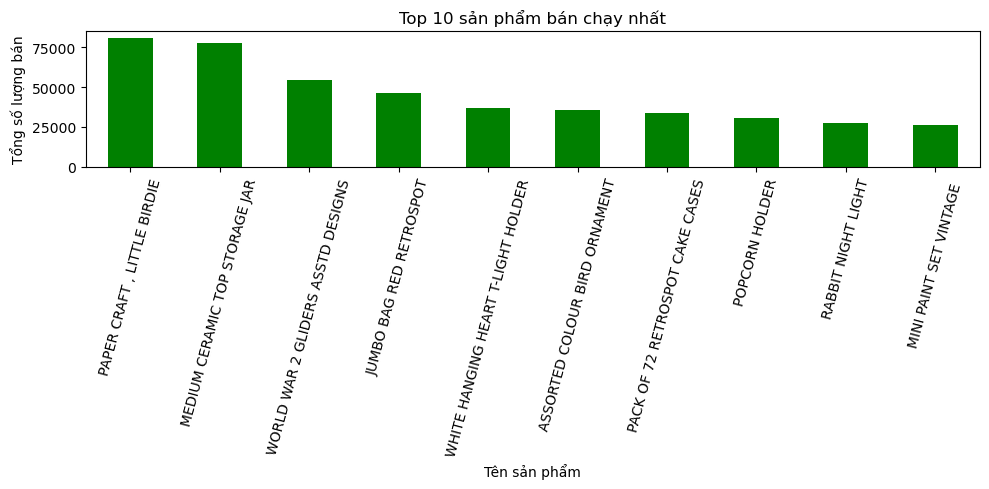

In [8]:
# T√≠nh t·ªïng s·ªë l∆∞·ª£ng b√°n ƒë∆∞·ª£c theo s·∫£n ph·∫©m
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='green')
plt.title('Top 10 s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t')
plt.xlabel('T√™n s·∫£n ph·∫©m')
plt.ylabel('T·ªïng s·ªë l∆∞·ª£ng b√°n')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7920\3897544605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='coolwarm')


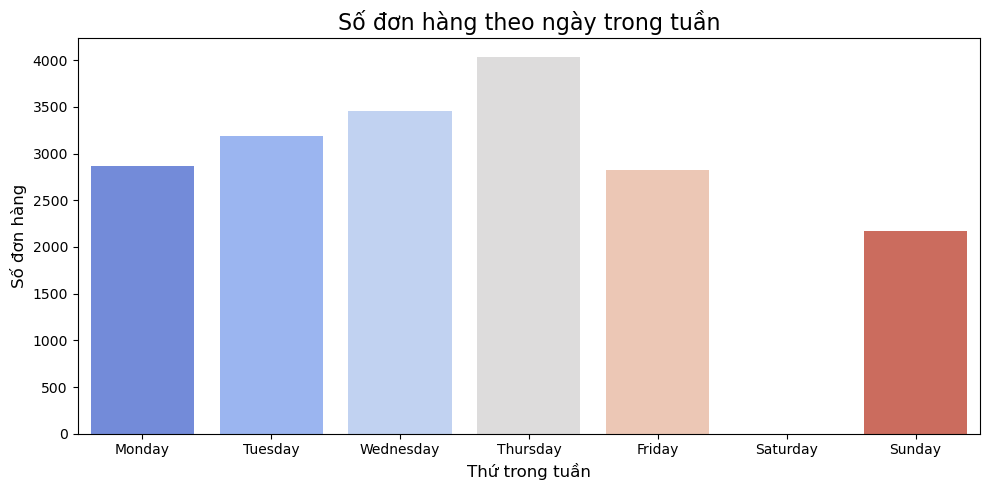

In [9]:
df['Weekday'] = df['InvoiceDate'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_by_day = df.groupby('Weekday')['InvoiceNo'].nunique().reindex(weekday_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='coolwarm')
plt.title('S·ªë ƒë∆°n h√†ng theo ng√†y trong tu·∫ßn', fontsize=16)
plt.xlabel('Th·ª© trong tu·∫ßn', fontsize=12)
plt.ylabel('S·ªë ƒë∆°n h√†ng', fontsize=12)
plt.tight_layout()
plt.show()


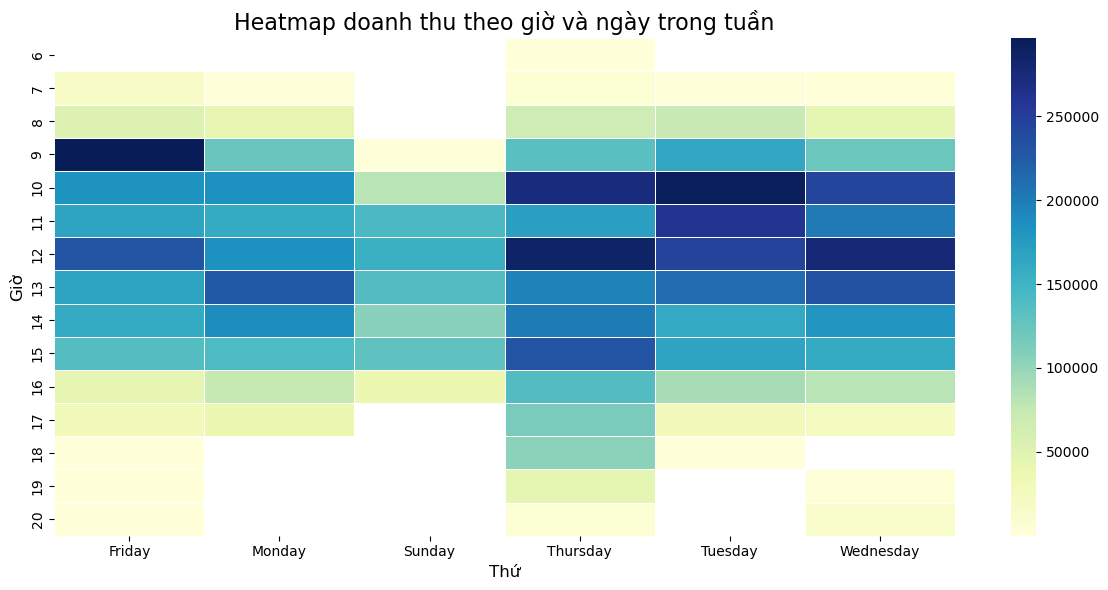

In [10]:
df['Date'] = df['InvoiceDate'].dt.date
pivot_table = df.pivot_table(index=df['InvoiceDate'].dt.hour,
                              columns=df['InvoiceDate'].dt.day_name(),
                              values='TotalPrice',
                              aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap doanh thu theo gi·ªù v√† ng√†y trong tu·∫ßn', fontsize=16)
plt.xlabel('Th·ª©', fontsize=12)
plt.ylabel('Gi·ªù', fontsize=12)
plt.tight_layout()
plt.show()


In [11]:
from mlxtend.frequent_patterns import apriori, association_rules

# L·ªçc ch·ªâ l·∫•y ƒë∆°n h√†ng t·∫°i UK ƒë·ªÉ ƒë∆°n gi·∫£n
df_uk = df[df['Country'] == 'United Kingdom']

# T·∫°o b·∫£ng gi·ªè h√†ng: m·ªói d√≤ng l√† m·ªôt h√≥a ƒë∆°n, m·ªói c·ªôt l√† s·∫£n ph·∫©m (1 n·∫øu c√≥ mua, 0 n·∫øu kh√¥ng)
basket = (df_uk
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum()
          .unstack()
          .fillna(0))

# ƒê∆∞a v·ªÅ d·∫°ng 1/0
def encode_units(x):
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7920\3734041393.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


In [12]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import time
from tabulate import tabulate

# Gi·∫£ ƒë·ªãnh basket_sets ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh d·∫°ng ƒë√∫ng (DataFrame nh·ªã ph√¢n)
start_apriori = time.time()

# T√¨m t·∫≠p m·ª•c th∆∞·ªùng xuy√™n v·ªõi min_support=0.02
frequent_apriori = apriori(basket_sets, min_support=0.02, use_colnames=True)

# Sinh lu·∫≠t k·∫øt h·ª£p v·ªõi min_lift=1
rules_apriori = association_rules(frequent_apriori, metric='lift', min_threshold=1)

end_apriori = time.time()
print(f"‚è± Apriori t√¨m ƒë∆∞·ª£c {len(rules_apriori)} lu·∫≠t trong {end_apriori - start_apriori:.2f} gi√¢y")

# L√†m tr√≤n c√°c gi√° tr·ªã s·ªë ƒë·ªÉ d·ªÖ ƒë·ªçc
rules_apriori['support'] = rules_apriori['support'].round(4)
rules_apriori['confidence'] = rules_apriori['confidence'].round(4)
rules_apriori['lift'] = rules_apriori['lift'].round(4)

# Ch·ªçn c√°c c·ªôt quan tr·ªçng ƒë·ªÉ hi·ªÉn th·ªã
display_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
formatted_rules = rules_apriori[display_columns].sort_values(by='lift', ascending=False).head(10)  # L·∫•y top 10

# ƒê·ªãnh d·∫°ng l·∫°i c·ªôt antecedents v√† consequents ƒë·ªÉ hi·ªÉn th·ªã d∆∞·ªõi d·∫°ng chu·ªói
formatted_rules['antecedents'] = formatted_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
formatted_rules['consequents'] = formatted_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Hi·ªÉn th·ªã b·∫£ng ƒë·∫πp v·ªõi tabulate
print("\nüîç Top 10 lu·∫≠t Apriori (theo lift):")
print(tabulate(formatted_rules, headers=['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'], tablefmt='psql', showindex=False, floatfmt='.4f'))

c:\Users\Admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


‚è± Apriori t√¨m ƒë∆∞·ª£c 76 lu·∫≠t trong 44.48 gi√¢y

üîç Top 10 lu·∫≠t Apriori (theo lift):
+-------------------------------------------------------------------+-------------------------------------------------------------------+-----------+--------------+---------+
| Antecedents                                                       | Consequents                                                       |   Support |   Confidence |    Lift |
|-------------------------------------------------------------------+-------------------------------------------------------------------+-----------+--------------+---------|
| GREEN REGENCY TEACUP AND SAUCER                                   | ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER  |    0.0205 |       0.5572 | 24.2167 |
| ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER  | GREEN REGENCY TEACUP AND SAUCER                                   |    0.0205 |       0.8903 | 24.2167 |
| PINK REGENCY TEACUP AND SAUC

In [13]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
import time
from tabulate import tabulate

# Gi·∫£ ƒë·ªãnh basket_sets ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh d·∫°ng ƒë√∫ng (DataFrame nh·ªã ph√¢n)
start_fpg = time.time()

# T√¨m t·∫≠p m·ª•c th∆∞·ªùng xuy√™n b·∫±ng FP-Growth v·ªõi min_support=0.02
frequent_fpg = fpgrowth(basket_sets, min_support=0.02, use_colnames=True)

# Sinh lu·∫≠t k·∫øt h·ª£p v·ªõi min_lift=1
rules_fpg = association_rules(frequent_fpg, metric='lift', min_threshold=1)

end_fpg = time.time()
print(f"‚ö° FP-Growth t√¨m ƒë∆∞·ª£c {len(rules_fpg)} lu·∫≠t trong {end_fpg - start_fpg:.2f} gi√¢y")

# L√†m tr√≤n c√°c gi√° tr·ªã s·ªë ƒë·ªÉ d·ªÖ ƒë·ªçc
rules_fpg['support'] = rules_fpg['support'].round(4)
rules_fpg['confidence'] = rules_fpg['confidence'].round(4)
rules_fpg['lift'] = rules_fpg['lift'].round(4)

# Ch·ªçn c√°c c·ªôt quan tr·ªçng ƒë·ªÉ hi·ªÉn th·ªã
display_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
formatted_rules = rules_fpg[display_columns].sort_values(by='lift', ascending=False).head(10)  # L·∫•y top 10

# ƒê·ªãnh d·∫°ng l·∫°i c·ªôt antecedents v√† consequents ƒë·ªÉ hi·ªÉn th·ªã d∆∞·ªõi d·∫°ng chu·ªói
formatted_rules['antecedents'] = formatted_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
formatted_rules['consequents'] = formatted_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Hi·ªÉn th·ªã b·∫£ng ƒë·∫πp v·ªõi tabulate
print("\nüîç Top 10 lu·∫≠t FP-Growth (theo lift):")
print(tabulate(formatted_rules, headers=['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'], tablefmt='psql', showindex=False, floatfmt='.4f'))

c:\Users\Admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


‚ö° FP-Growth t√¨m ƒë∆∞·ª£c 76 lu·∫≠t trong 11.32 gi√¢y

üîç Top 10 lu·∫≠t FP-Growth (theo lift):
+-------------------------------------------------------------------+-------------------------------------------------------------------+-----------+--------------+---------+
| Antecedents                                                       | Consequents                                                       |   Support |   Confidence |    Lift |
|-------------------------------------------------------------------+-------------------------------------------------------------------+-----------+--------------+---------|
| GREEN REGENCY TEACUP AND SAUCER                                   | ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER  |    0.0205 |       0.5572 | 24.2167 |
| ROSES REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER  | GREEN REGENCY TEACUP AND SAUCER                                   |    0.0205 |       0.8903 | 24.2167 |
| ROSES REGENCY TEACUP AND

In [14]:
summary = pd.DataFrame({
    'Thu·∫≠t to√°n': ['Apriori', 'FP-Growth'],
    'S·ªë lu·∫≠t t√¨m ƒë∆∞·ª£c': [len(rules_apriori), len(rules_fpg)],
    'Th·ªùi gian (gi√¢y)': [end_apriori - start_apriori, end_fpg - start_fpg]
})

print(summary)


  Thu·∫≠t to√°n  S·ªë lu·∫≠t t√¨m ƒë∆∞·ª£c  Th·ªùi gian (gi√¢y)
0    Apriori                76         44.481355
1  FP-Growth                76         11.321751


C:\Users\Admin\AppData\Local\Temp\ipykernel_7920\3262925604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['Thu·∫≠t to√°n'], y=summary['Th·ªùi gian (gi√¢y)'], palette='Set2')


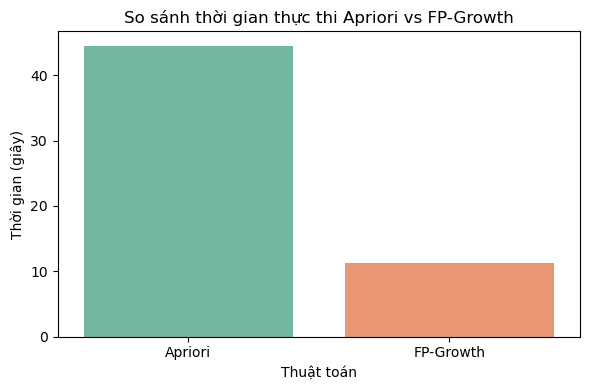

In [15]:
# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh th·ªùi gian th·ª±c thi c·ªßa hai thu·∫≠t to√°n
plt.figure(figsize=(6, 4))
sns.barplot(x=summary['Thu·∫≠t to√°n'], y=summary['Th·ªùi gian (gi√¢y)'], palette='Set2')
plt.title('So s√°nh th·ªùi gian th·ª±c thi Apriori vs FP-Growth')
plt.ylabel('Th·ªùi gian (gi√¢y)')
plt.xlabel('Thu·∫≠t to√°n')
plt.tight_layout()
plt.show()

In [29]:
# T√≠nh t·ªïng CPU v√† RAM ƒë√£ s·ª≠ d·ª•ng cho t·ª´ng thu·∫≠t to√°n
resource_usage_2algos['CPU ƒë√£ s·ª≠ d·ª•ng (MB)'] = resource_usage_2algos['CPU (%)']
resource_usage_2algos['RAM ƒë√£ s·ª≠ d·ª•ng (MB)'] = resource_usage_2algos['RAM (MB)']

print(resource_usage_2algos[['Thu·∫≠t to√°n', 'CPU ƒë√£ s·ª≠ d·ª•ng (MB)', 'RAM ƒë√£ s·ª≠ d·ª•ng (MB)']])

  Thu·∫≠t to√°n  CPU ƒë√£ s·ª≠ d·ª•ng (MB)  RAM ƒë√£ s·ª≠ d·ª•ng (MB)
0    Apriori                24.94                68.15
1  FP-Growth                24.97                71.54


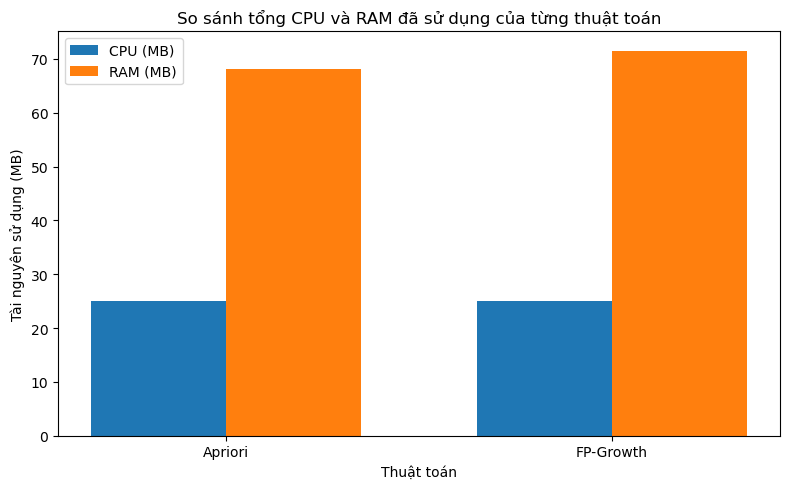

In [30]:
plt.figure(figsize=(8, 5))
bar_width = 0.35
index = range(len(resource_usage_2algos['Thu·∫≠t to√°n']))

plt.bar(index, resource_usage_2algos['CPU ƒë√£ s·ª≠ d·ª•ng (MB)'], bar_width, label='CPU (MB)', color='tab:blue')
plt.bar([i + bar_width for i in index], resource_usage_2algos['RAM ƒë√£ s·ª≠ d·ª•ng (MB)'], bar_width, label='RAM (MB)', color='tab:orange')

plt.xlabel('Thu·∫≠t to√°n')
plt.ylabel('T√†i nguy√™n s·ª≠ d·ª•ng (MB)')
plt.title('So s√°nh t·ªïng CPU v√† RAM ƒë√£ s·ª≠ d·ª•ng c·ªßa t·ª´ng thu·∫≠t to√°n')
plt.xticks([i + bar_width / 2 for i in index], resource_usage_2algos['Thu·∫≠t to√°n'])
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7920\4162030635.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


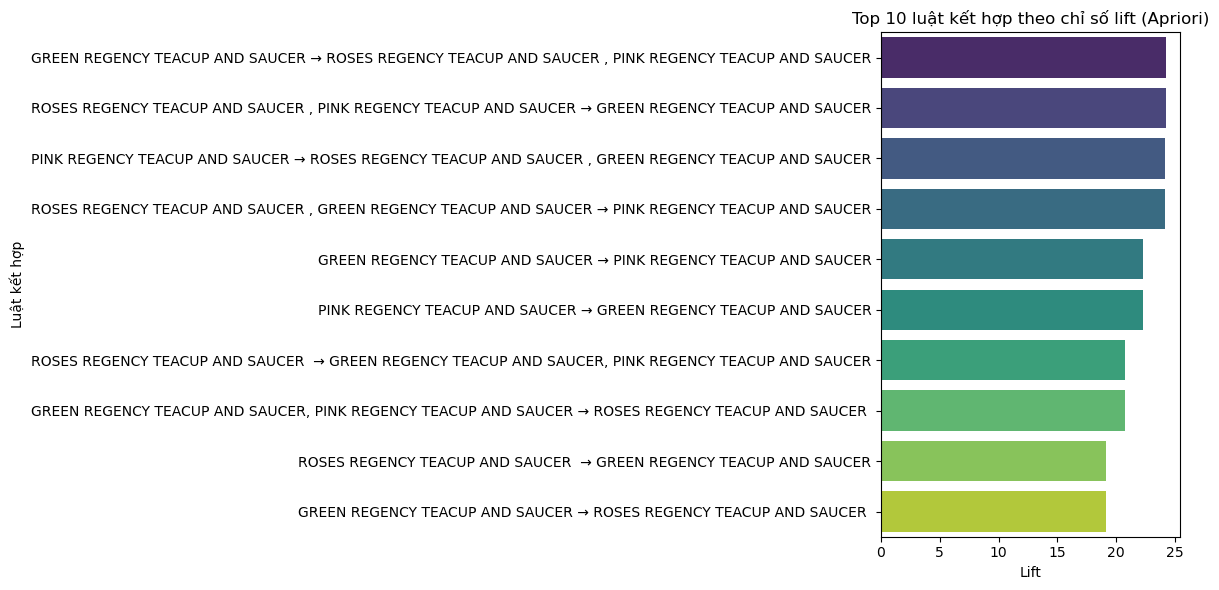

In [16]:
# Tr·ª±c quan h√≥a top 10 lu·∫≠t k·∫øt h·ª£p theo ch·ªâ s·ªë lift (d√πng Apriori)
if 'rules_apriori' not in locals():
    print("‚ö†Ô∏è B·∫°n c·∫ßn ch·∫°y cell sinh lu·∫≠t k·∫øt h·ª£p Apriori tr∆∞·ªõc khi tr·ª±c quan h√≥a!")
else:
    top_rules = rules_apriori.sort_values(by='lift', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=top_rules['lift'],
        y=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' ‚Üí ' + top_rules['consequents'].apply(lambda x: ', '.join(list(x))),
        palette='viridis'
    )
    plt.xlabel('Lift')
    plt.ylabel('Lu·∫≠t k·∫øt h·ª£p')
    plt.title('Top 10 lu·∫≠t k·∫øt h·ª£p theo ch·ªâ s·ªë lift (Apriori)')
    plt.tight_layout()
    plt.show()